## Generating Lissajous Curves: An anisotropic oscillator 

### Introduction: Lissajous Curves

Every physics student knows perfectly well that if you give some angular momentum to a spherical pendulum without any friction, since it is moved by a central force, it will move in a closed elliptical orbit. However, if you are able to modify the pendulum in such a way that its frequency depends on the direction of oscillation, you will discover some truly fascinating patterns: The Lissajous curve's. 

The definition of a Lissajous curve is quite simple. It refers to the graph generated by this set of parametric equations:

$x = A \cos \omega_x t + \delta$
$y = B \cos \omega_y t $


However, they possess some interesting properties. For instance, a Lissajous Curve is closed when the motion repeats itself at regular intervals of time. This occurs if and only if the frequencies, denoted by $\omega_x$ and $\omega_y$, are commensurable, meaning that the ratio of $\omega_y$ to $\omega_x$ is a rational number $\frac{m}{n} \in \mathbb{Q}$. 

The explanation is  clear: a curve traced by the pendulum is closed if the pendulum revisits the same position with the same velocity at different times. For this to happen, the pendulum must complete $m$ oscillations in the x direction and $n$ oscillations in the y direction simultaneously at some time t. This condition is expressed by the equation $t = m T_x = nT_y$, where $T_x$ and $T_y$ represent the periods of oscillation in the x and y directions, respectively. 

Some examples are:

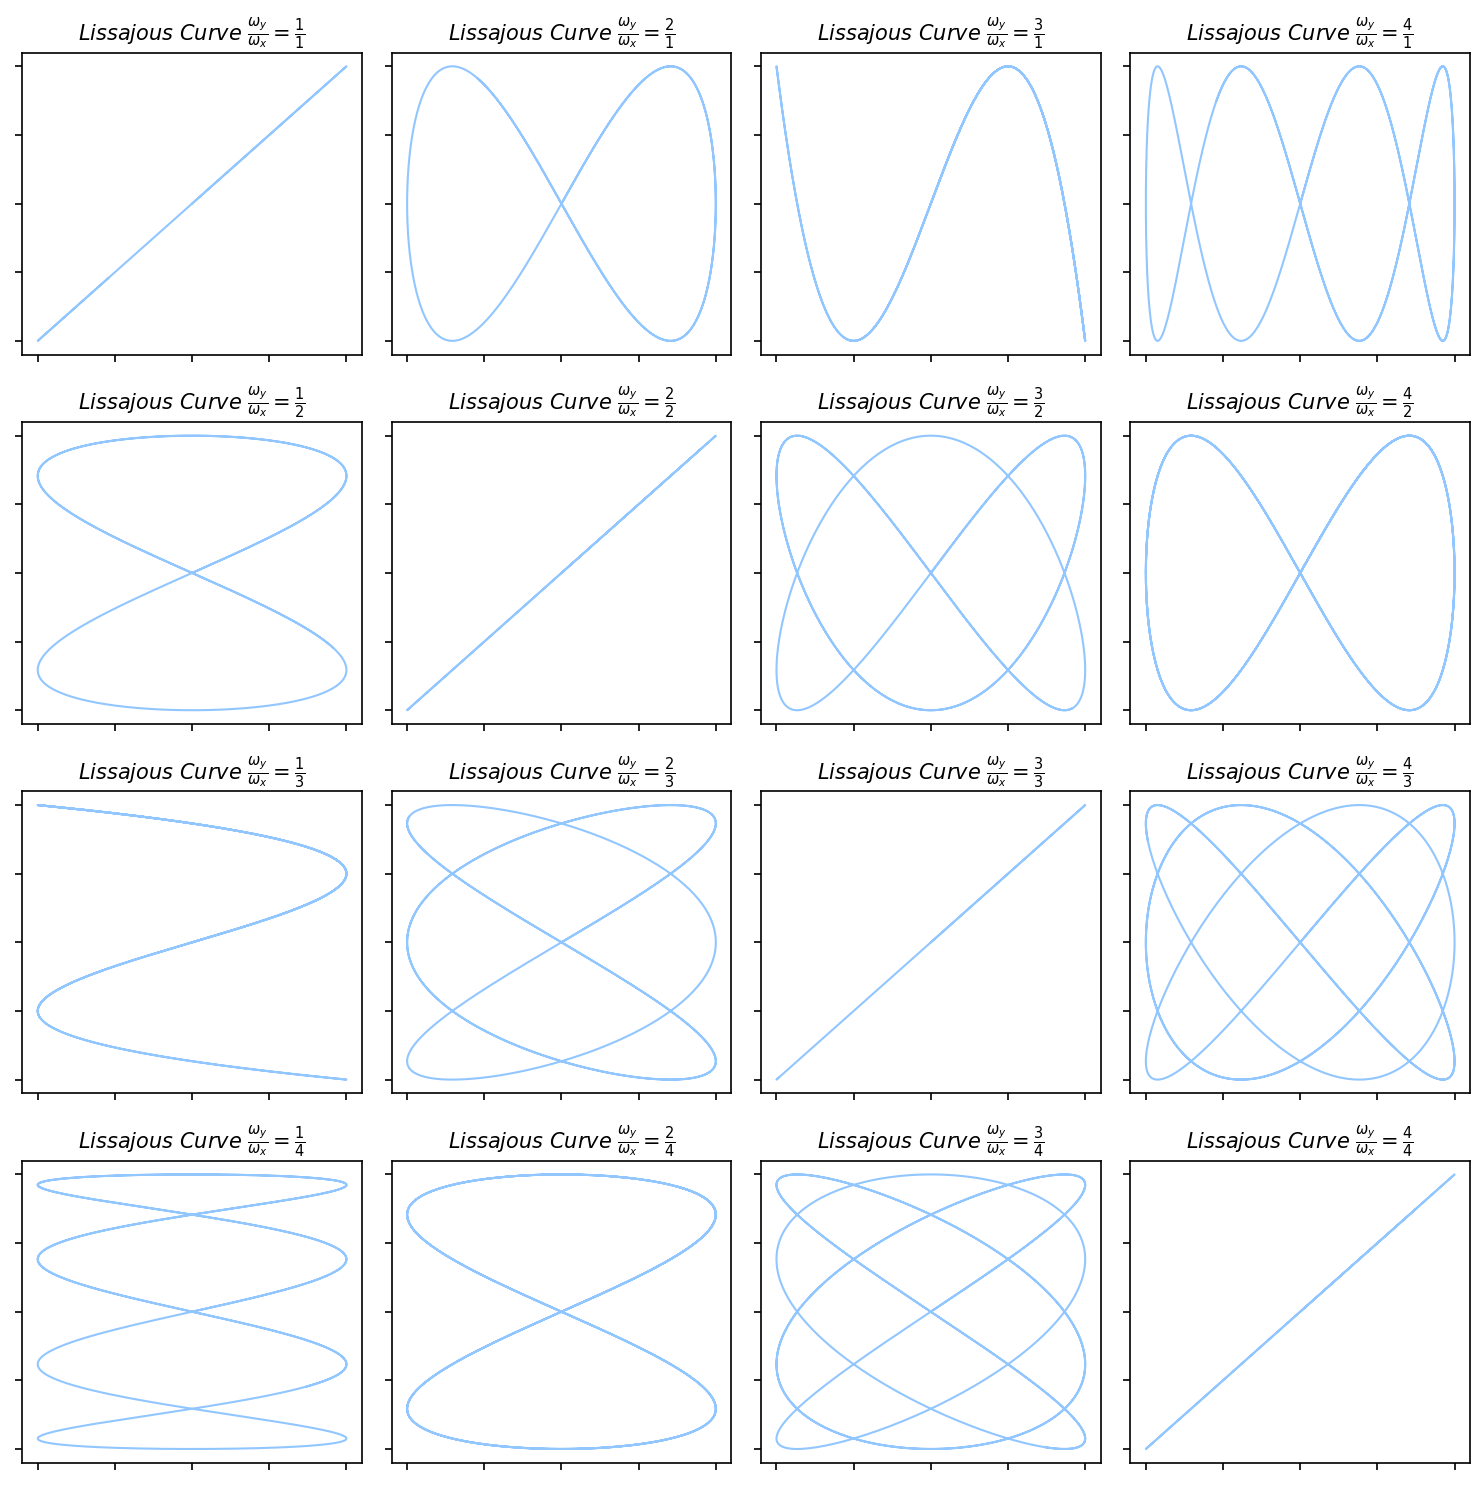

In [152]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

#First kind of Lissajous Curves: Rational relations between frequencies

fig, axs = plt.subplots(4,4, sharex = True, sharey = True, figsize = (10,10), dpi = 150)

time = np.linspace(0,10, 1000)
for n in range(1,5):
    for m in range(1,5):
        x = np.sin(n*time)
        y = np.sin(m*time)
        axs[n-1, m-1].plot(x,y, lw = 1)
        axs[n-1, m-1].set_yticklabels([])
        axs[n-1, m-1].set_xticklabels([])
        axs[n-1, m-1].set_title(r'Lissajous Curve $\frac{\omega_y}{\omega_x} = \frac{'+str(m)+'}{'+str(n)+'}$', fontsize = 10, fontstyle = 'italic')
fig.tight_layout() 

    

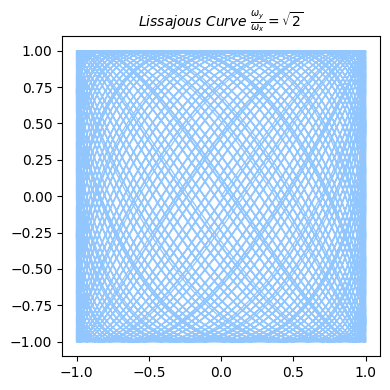

In [153]:
#irrational relations between frequencies
time = np.linspace(0, 500, 10000)
x = np.sin(time)
y = np.sin(np.sqrt(2)*time)
fig = plt.figure(figsize = (4,4),dpi = 100)
plt.plot(x,y, lw = 1)
plt.title(r'Lissajous Curve $\frac{\omega_y}{\omega_x} = \sqrt{2} $', fontsize = 10, fontstyle = 'italic')

fig.tight_layout() 



Another intersting property of Lissajous curves is their connection to Chebyshev polynomials. The Chebyshev polynomials of the first kind, denoted as $T_n(\cos \theta)$, are defined as:

$T_n(\cos \theta) = \cos(n \theta)$

By setting $\omega_y = n \omega_x$, $A = B = 1$, and defining $\theta = \omega_x t$ and $x = \cos \theta$, we can observe that the parametric equations of the Lissajous curve take the form:

$y = \cos(\omega_y t) = \cos(n \omega_x t) = \cos(n \theta) = T_n(\cos \theta) = T_n(x)$

This remarkable relation shows that the graph of a Lissajous curve, for certain values of $\omega_x$ and $\omega_y$ (when they are commensurable), corresponds to the plot of the $n$-th Chebyshev polynomial $T_n(x)$.

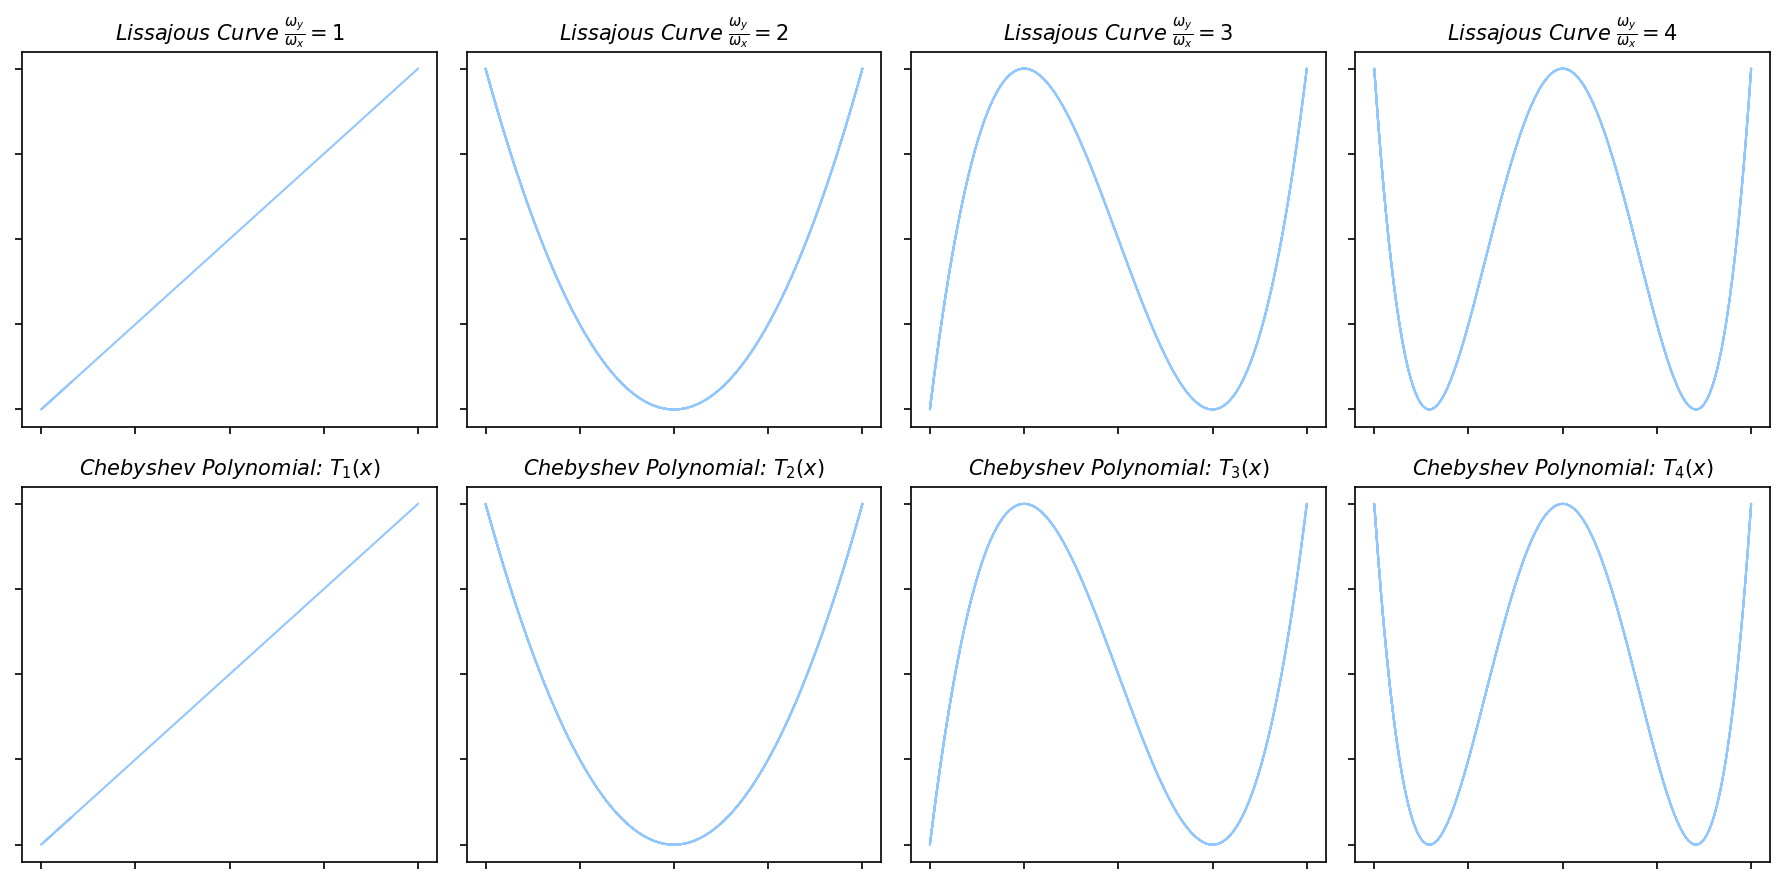

In [154]:
#Lissajous Curves as Chebyshev Polynomials
from scipy.special import eval_chebyt
fig, axs = plt.subplots(2, 4, sharex = True, sharey = True, figsize = (12,6), dpi = 150)
time = np.linspace(0,10, 1000)
n = 1
for m in range(1,5):
    x = np.cos(time)
    y = np.cos(m*time)
    axs[0, m-1].plot(x,y, lw = 1)
    axs[0,m-1].set_yticklabels([])
    axs[0, m-1].set_xticklabels([])
    axs[0, m-1].set_title(r'Lissajous Curve $\frac{\omega_y}{\omega_x} = '+str(m)+'$', fontsize = 10, fontstyle = 'italic')
    x_ch = np.linspace(-1,1, len(time))
    y_ch = eval_chebyt(m, x)
    axs[1, m-1].plot(x,y, lw = 1)
    axs[1,m-1].set_yticklabels([])
    axs[1, m-1].set_title(r'Chebyshev Polynomial: $T_{'+str(m)+'}(x)$', fontsize = 10, fontstyle = 'italic')
    
    
fig.tight_layout() 


### Physical model

There are some different ways to reproduce physically these figures:
1. **Simple Pendulum with Different Lengths:** 

To generate a Lissajous curve in real life you need some oscillator like a pendulum that has two different frequencies at two different axis. Since the frequency of the simple pendulum is given by
$\omega = \sqrt{\frac{g}{l}}$ one way to do so is building a pendulum that can oscilate with a lenght $l_x$ arround the x axis and with a lenght $l_y$ arround the y axis. This is usually achieved with the following set up:

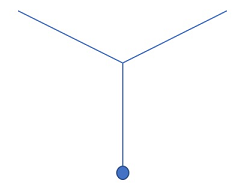

The central node can only oscilate around y axis while the rest of the pendulum is equivalent to a spherical pendulum. Then if $d$  is the distance between the ceiling and the node and $l$ is the lenght of the spherical pendulum then $l_x = l$ and $l_y = l + d$, therefore the frequencies at the x and y axis will be different. 

Other methods that can be considered are:

2.  **Physical Pendulum with Different Moments of Inertia:**

The frequency of oscillation a physical pendulum around a some axis is given by $\omega = \sqrt{\frac{mg l}{I}} where I is the inertia momentum arround that axis at the fixed point. Therefore,  if the pendulum at the fixed point has different moments of inertia along the x and y axes, it will result in different frequencies of oscillation for each direction.

3. **Particle slicing inside an ellipsoide**

A spherical pendulum with lenght $R$ is physically equivalent to a particle slicing inside a sphere considering in both cases that the particle is confined to the surface of a sphere of radius $R$. Therefore, a particle at the bottom of a sphere should oscillate with a frequency $\omega = \sqrt{\frac{g}{R}}$. 

Now lets consider an elliposid of semiaxis a,b,c aligned with some cartesian axis. At the bottom of the ellipsoid the radius of curvature along the x axis will be $R_x = \frac{b^2}{c}$ while $R_y = \frac{a^2}{c}$. For simplicity we could assume that $c= a$ so $R_y = a$. Then, for small oscillations arround the bottom of the ellipsoid we will have two different frequencies of oscillation arround $x$ axis and $y$ axis :

$\omega_x = \sqrt{\frac{g a}{b^2}}$

$\omega_y = \sqrt{\frac{g}{a}}$ 

thus generating Lissajous curves. 


In this first project I will try to verify if a particle slicing inside a ellipsoid is a propper model to generate Lissajous curves. 

### Calculating the Lagrangian and the EoM

In order to obtain the Lagrangian we first set what coordinates we will use. The most obvious election are: 

$x = a \cos u \sin v$

$y = b \sin u \sin v$

$z = a \cos u$

Here, $u$ and $v$ represent the generalized coordinates corresponding to the two degrees of freedom of the system where $u \in [0, 2 \pi)$ and $v \in [0, \pi)$


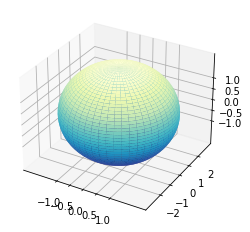

In [180]:
#Drawing an ellipsoid
u_demo, v_demo  =np.meshgrid(np.linspace(0, 2*np.pi,1000), np.linspace(0, np.pi, 1000))
a = 1
b = 2
x = l1*np.cos(u_demo)*np.sin(v_demo)
y = l2*np.sin(u_demo)*np.sin(v_demo)
z = l1*np.cos(v_demo)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-2,-1,0, 1,2])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)

plt.show()

Here, I will try to reproduce some Lissajous Curves simulating a particle slicing incide an ellipsoid 

Once we have obtained the coordinates of this anisotropic pendulum we can calculate the Lagrangian as follows:

In [181]:
import sympy as smp
t, a , b, m, g = smp.symbols('t a b m g', real = True, positive = True)
u, v = smp.symbols ('u v', cls = smp.Function)
u, v = u(t), v(t)
dudt = smp.diff(u,t)
dvdt = smp.diff(v,t)

x = b*smp.cos(u)*smp.sin(v)
y = a*smp.sin(u)*smp.sin(v)
z = b*smp.cos(v)

The kinetic energy is given by:
$T = \frac{1}{2}m (\dot{x}^2 + \dot{y}^2 + \dot{z}^2)$ so

In [182]:
T = smp.Rational(1,2)*m*((smp.diff(x,t))**2  + (smp.diff(y,t))**2 + (smp.diff(z,t))**2)

The potential energy is simply given by $U = mgz$ so the Lagrangian is

In [183]:
U = m*g*z
L = T- U

Then the Euler-Lagrange equations are:

$\frac{\partial \mathcal{L}}{\partial u} - \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial u} = 0 $

$\frac{\partial \mathcal{L}}{\partial v} - \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial v} = 0 $

In [184]:
eq1 = smp.diff(L, u) - smp.diff(smp.diff(L, dudt), t)
eq2 = smp.diff(L, v) - smp.diff(smp.diff(L, dvdt), t)

In [185]:
sols = smp.solve([eq1,eq2],  [smp.diff(u,t,t), smp.diff(v,t,t)])

Finally we obtain the expressions of $\ddot{u}$ and $\ddot{v}$ as functions of $\dot{u}, \dot{v}, u, v, t$ with wich we are able to solve the Euler Lagrange Equations numerically. 

In [186]:
d2udt2 = sols[smp.diff(u,t,t)]
d2vdt2 = sols[smp.diff(v,t,t)]

In [187]:
du2dt2_f = smp.lambdify([a,b, g, dudt, dvdt, u, v], d2udt2)
dv2dt2_f = smp.lambdify([a,b, g, dudt, dvdt, u, v], d2vdt2)

### Numerical solution

In [188]:
from scipy.integrate import odeint

In [189]:
g_num = 9.81
def edo(S, t, l1, l2, g):
    u, v = S[0], S[1]
    dudt, dvdt = S[2], S[3]
    d2udt2, d2vdt2 = du2dt2_f(l2, l1, g, dudt, dvdt, u,v),dv2dt2_f(l2, l1, g, dudt, dvdt, u,v)
    return np.array([dudt, dvdt, d2udt2, d2vdt2])
def lissajous(l1,l2, u0_num, v0_num, du0, dv0, ret):
    S0= np.array([u0_num, v0_num, du0,dv0])
    time_num = np.linspace(0, 30, 3000)
    solucions = odeint(edo, S0, time_num, args =(l1,l2,g_num))
    v = solucions.T[1]
    u = solucions.T[0]
    y_num = l2*np.cos(u)*np.sin(v)
    x_num = l1*np.sin(u)*np.sin(v)
    z_num = l1*np.cos(v)
    if ret == False:
        fig, ax = plt.subplots(dpi = 100)
        ax.plot(x_num[:-1], y_num[:-1])
        ax.set_title(r'Pendulum trajectory with $a =$'+str(l1)+' , $b ='+str(l2)+'$')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.show()
    else:
        return time_num, x_num, y_num, z_num
    


### Analysis of the solution

Before attempting to reproduce the first kind of Lissajous figures, we must analyze the solutions to the equations of motion and approximate $x(t)$ and $y(t)$ as sinusoidal functions with different frequencies.

Let us define $\theta$ and $\varphi$ as the pendulum angles around the x and y axes, respectively, such that $x = A\sin \varphi$ and $y = B \sin \theta$. Moreover, if $\varphi$ and $\theta$ are close  enough to the equilibrium, we can make the approximations $x \approx A \varphi$ and $y \approx B \theta$. Similar to the case of a simple pendulum, we expect that $\varphi$ and $\theta$ will follow harmonic motion around the equilibrium position, which will cause $x$ and $y$ to do the same.

From the coordinates $x, y, z$ we can get $\theta$ and $\varphi$ with $\theta = \arctan(\frac{z}{y})$ and $\varphi = \arctan(\frac{z}{x})$

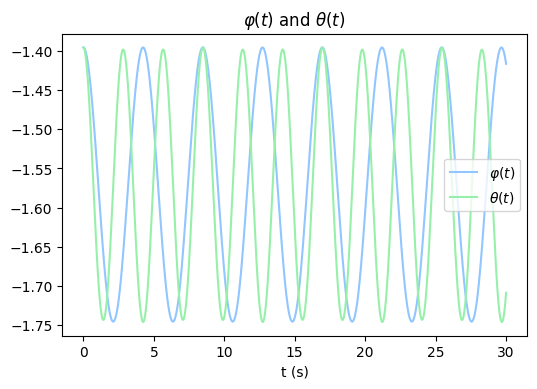

In [190]:
l1, l2 = 2,3
time_num, x_num, y_num, z_num = lissajous(l1,l2, np.arctan(l2/l1),np.pi-np.pi/15, 0,0, True)

phi_num = np.arctan2(z_num, x_num)
phi_num_norm = phi_num/np.max(phi_num)
theta_num = np.arctan2(z_num, y_num)
theta_num_norm = theta_num/np.max(theta_num)

fig, ax = plt.subplots(dpi = 100)
ax.plot(time_num, phi_num, label = r'$\varphi(t)$')
ax.plot(time_num, theta_num, label = r'$\theta(t)$')
ax.set_xlabel('t (s)')
plt.legend()
ax.set_title(r'$\varphi(t)$ and $\theta(t)$')
plt.show()

Once we have verified that $\varphi (t)$ and $\theta(t)$  follow an harmonic motion we must determine at which frequency they oscillate. 

We should expect that when the pendulum oscillates arround the x axis $\theta$ oscillates as a simple pendulum with lenght $a$. Therefore the oscillation period of $\theta (t)$ should be  $T = 2 \pi \sqrt{\frac{a}{g}}$ as we will confirm in the following analysis of the numerical solution. 

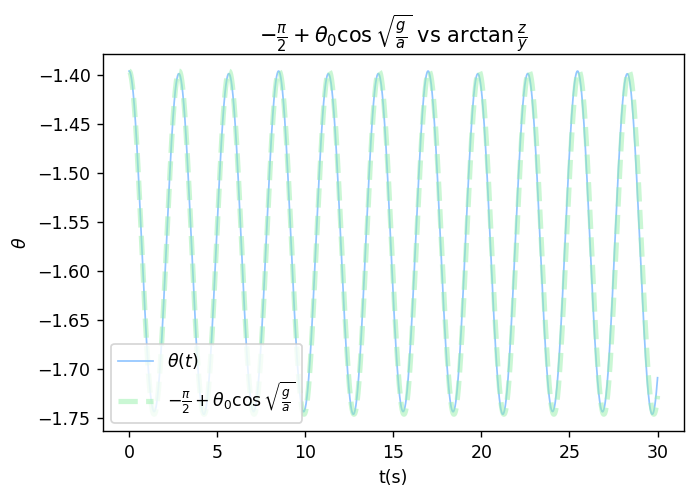

In [191]:
max_theta = [theta_num[i] for i in range(5, len (phi_num)) if theta_num[i] == max(theta_num[i-5:i+5])]
max_t = [time_num[i] for i in range(5, len (phi_num)) if theta_num[i] == max(theta_num[i-5:i+5])]
periods_theta = np.array(max_t)[1:]- np.array(max_t)[:-1]

theta_independent2 = - np.pi/2 + (max(max_theta)+np.pi/2)*np.cos(np.sqrt(g_num/(l1)) * time_num)

fig, ax = plt.subplots(dpi = 125)
ax.plot(time_num, theta_num, lw = 1,  label = r'$\theta(t)$')
ax.plot(time_num, theta_independent2, '--', lw = 3, alpha = 0.5, label = r'$- \frac{\pi}{2} + \theta_0 \cos \sqrt{\frac{g}{a}}$')
plt.legend(loc = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel(r'$\theta$')
ax.set_title(r'$ - \frac{\pi}{2} + \theta_0 \cos \sqrt{\frac{g}{a}}$ vs $\arctan \frac {z}{y}$')
plt.show()


As we stated before the frequency of oscillation arroud $\omega_x = \sqrt{\frac{a g}{b^2}}$ Therefore we expect a period of $T = 2\pi \sqrt{\frac{b^2}{a g}}$

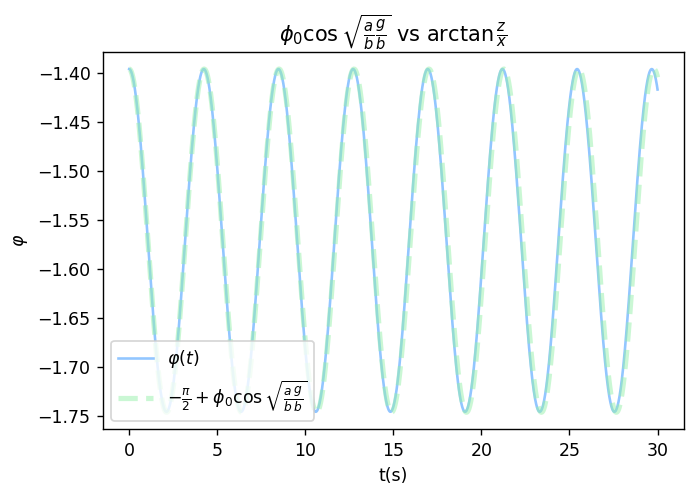

In [192]:
max_phi = [phi_num[i] for i in range(5, len (phi_num)) if phi_num[i] == max(phi_num[i-5:i+5])]
max_t = [time_num[i] for i in range(5, len (phi_num)) if phi_num[i] == max(phi_num[i-5:i+5])]
periods_phi = np.array(max_t)[1:]- np.array(max_t)[:-1]
phi_independent = - np.pi/2 + (max(max_phi)+np.pi/2)*np.cos(np.sqrt(g_num*l1/(l2**2)) * time_num)

fig, ax = plt.subplots(dpi = 125)
ax.plot(time_num, phi_num, label = r'$\varphi(t)$')
ax.plot(time_num, phi_independent, '--', lw = 3, alpha = 0.5, label = r'$ -\frac{\pi}{2}+ \phi_0 \cos \sqrt{\frac{a}{b}\frac{g}{b}} $ ')
ax.set_xlabel('t(s)')
ax.set_ylabel(r'$\varphi$')
ax.set_title(r'$\phi_0 \cos \sqrt{\frac{a}{b}\frac{g}{b}}$ vs $\arctan \frac {z}{x}$')
plt.legend(loc = 3)
plt.show()

### Reproducing  Chebishev Polynomials with anistropical pendulum:

Thefore for small angles arround the equilibrium:

$ x = A_1 \cos( \sqrt{\frac{a}{b} \frac{g}{b}}t + \delta_x)$

$y = A_2 \cos( \sqrt{\frac{g}{b} t} + \delta_y)$

We should note that $\frac{\omega_y}{\omega_x} = \frac{b}{a}$, so we expect the trajectories to be closed if $\frac{b}{a} \in \mathbb{Q}$. 

In order to check that the tractories of the solutions to the equation of motion give Lissajous curves, first of all we will try to reproduce Chevishev polynomials. The equations of Chebishev polynomials are $x = \cos \theta$ $T_n = y = \cos n \theta$ so at $t_0 = 0$ $x= x_{max}$ and $y = y_{max}$. Hence, we must start with the pendulum at rest with $x_0 = y_0 = x_{max} = y_{max}$. To achieve this, we start with the pendulum at rest with $x_0 = y_0 = x_{max} = y_{max}$. To do so, we need to satisfy the condition $\frac{y_0}{x_0}= 1 \Rightarrow \frac{l_1}{l_2} \tan u_0 = 1 \Rightarrow u_0 = \arctan \left(\frac{l_2}{l_1}\right)$.

Since harmonic oscillations only occur around the equilibrium, $\theta_0$ must be $\pi \pm \epsilon$. On the other hand, $\dot{u} = \dot{v} = 0$ initially.

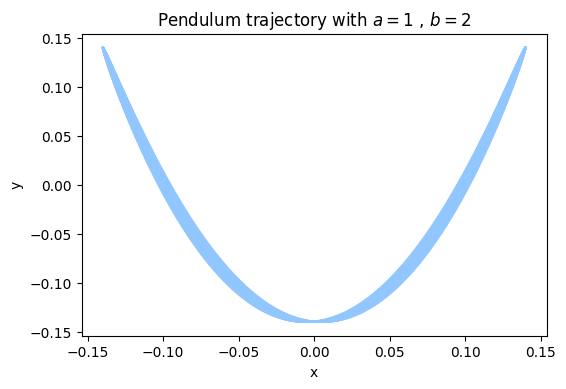

In [193]:
lissajous(1,2, np.arctan(2), np.pi-np.pi/20, 0,0, False)

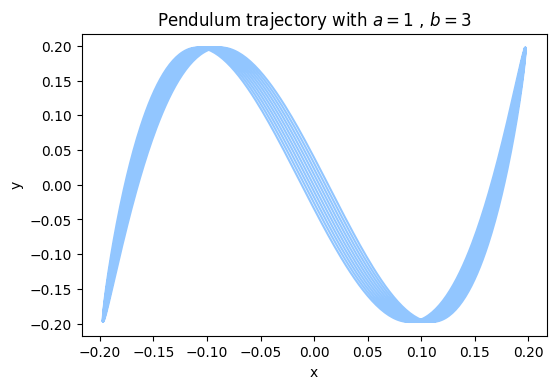

In [194]:
lissajous(1,3, np.arctan(3), np.pi-np.pi/15,0,0, False)

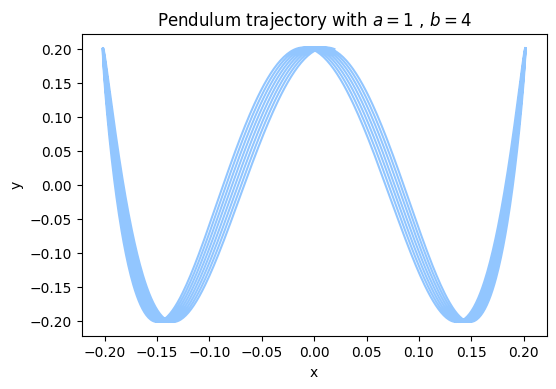

In [195]:
lissajous(1,4, np.arctan(4), np.pi-np.pi/15,0,0, False)

### Reproducing Lissajous curves with an anisotropical Pendulum

In order to reproduce the first kind of Lissajous Curves we should could write x and y as $x = A \sin \omega_x t $ and $y = A \sin \omega_y t$. Then $\delta_x = \delta_y = \frac{\pi}{2}$ [1] and $A_1 = A_2$ [2] .

The first condition implies that $x_0 = y_0 = 0 \Rightarrow v_0 = 0$ and $\dot{x}_0 = \dot{x}_{max}$, $\dot{y}_0 = \dot{y}_{max}$. On the other hand, in general the amplitude of an harmonic motion is given by $A = \sqrt{q_0^2 + \frac{\dot{q}_0}{\omega}^2}$ So, considering that:

$\dot{x} = l_1 ( - \sin u \sin v \dot{u} + \cos u \cos v \dot{v})$

$\dot{y} = l_2 ( \cos u \sin v \dot{u} +  \sin u \cos v \dot{v}) $

and $v_0 = \pi$,  the condition $A_1 = A_2$ implies that :

$\sqrt{x_0^2 + \frac{\dot{x}_0}{\omega_x}^2} = \sqrt{y_0^2 + \frac{\dot{y}_0}{\omega_y }^2} \Rightarrow  \frac{\dot{x}_0}{\omega_x} = \frac{\dot{y}_0}{\omega_y} \Rightarrow  \frac{l_1 \dot{v}_0 \cos u }{\omega_x} = \frac{l_2 \dot{v}_0 \sin u }{\omega_y} \Rightarrow  \tan u \frac{l_2}{l_1} = \frac{\omega_y}{\omega_x} \Rightarrow \tan u = 1 \Rightarrow u = \frac{\pi}{4}$ 

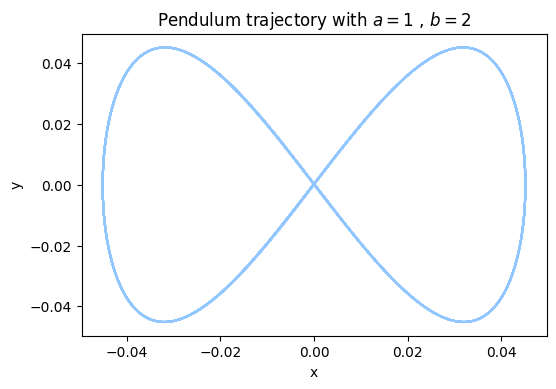

In [204]:
lissajous(1,2, np.pi/4,np.pi+0.00001, 0.5,0.1, False)

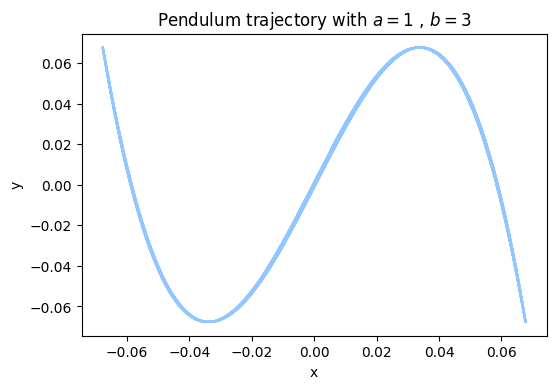

In [205]:
lissajous(1,3, np.pi/4, np.pi+0.0001, 0.5,0.1, False)

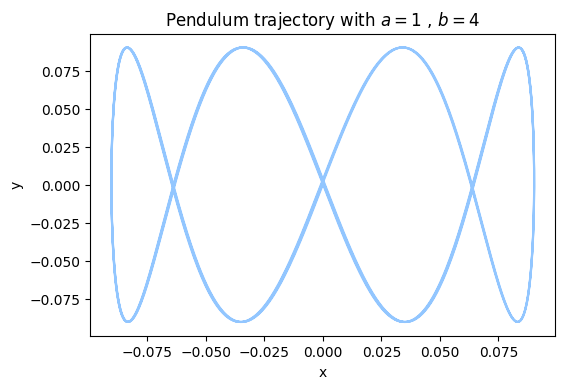

In [206]:
lissajous(1,4, np.pi/4, np.pi+0.00001, 0.5,0.1, False,)

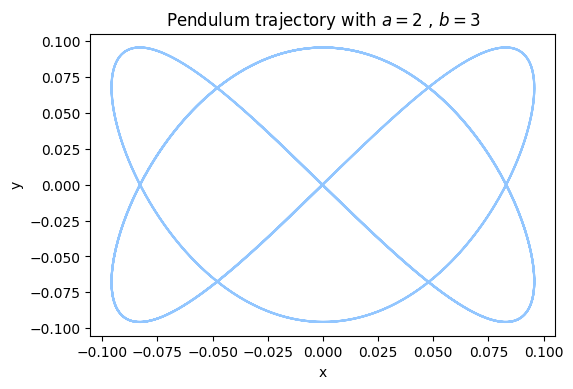

In [207]:
lissajous(2,3, np.pi/4, np.pi+0.0001, 0.5,0.1, False)